<a href="https://colab.research.google.com/github/meijaj/meijaj/blob/main/STAN_GoogleColab_example_Jan2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install package CmdStanR from GitHub
library(devtools)
devtools::install_github("stan-dev/cmdstanr", dependencies=c("Depends", "Imports"))
library(cmdstanr)
# Install CmdStan binaries
if (!file.exists("cmdstan-2.23.0.tar.gz")) {
  system("wget https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz", intern=T)
  system("tar zxf colab-cmdstan-2.23.0.tar.gz", intern=T)
}
# Set cmdstan_path to CmdStan installation
set_cmdstan_path("cmdstan-2.23.0")

**Atomic weight of tellurium (Clarke 1897)**

In [9]:
# Random effects statistical model (Stan)
model <- "
data {
  int<lower=0> N;
  vector[N] A;
  vector<lower=0>[N] uA;
}
parameters {
  real A_consensus;
  real<lower=0> dark_unc;
}
model {
  A_consensus ~ normal(127,10); // vague prior on the consensus value
  dark_unc ~ cauchy(0, 10);     // vague prior on the overdispersion (dark uncertainty)
  // likelihood 
  for(i in 1:N) A[i] ~ normal(A_consensus, sqrt(uA[i]^2 + dark_unc^2));
}
"

model_file <- write_stan_file(model)

In [25]:
# Compile the Stan model
model <- cmdstan_model(stan_file=model_file)
# Specify data
data <- list(N = 6, A = c(127.040, 126.303, 126.209, 126.650, 126.502, 125.960),
uA = c(0.024, 0.036, 0.020, 0.045, 0.212, 0.233))
# Fit the model to the data
fit <- model$sample(data = data)

Running MCMC with 4 sequential chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 Ite

In [26]:
# Summary of the fitted model
fit$summary()

variable,mean,median,sd,mad,q5,q95,rhat,ess_bulk,ess_tail
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lp__,1.1255348,1.4961950,1.1968174,0.8421983,-1.2297925,2.2599865,1.000436,1310.415,1227.653
A_consensus,126.4756760,126.4710000,0.2418636,0.1853250,126.1309500,126.8400000,1.003382,1517.391,1305.546
dark_unc,0.5093679,0.4457125,0.2608316,0.1672299,0.2531943,0.9659609,1.001631,1565.073,1439.458


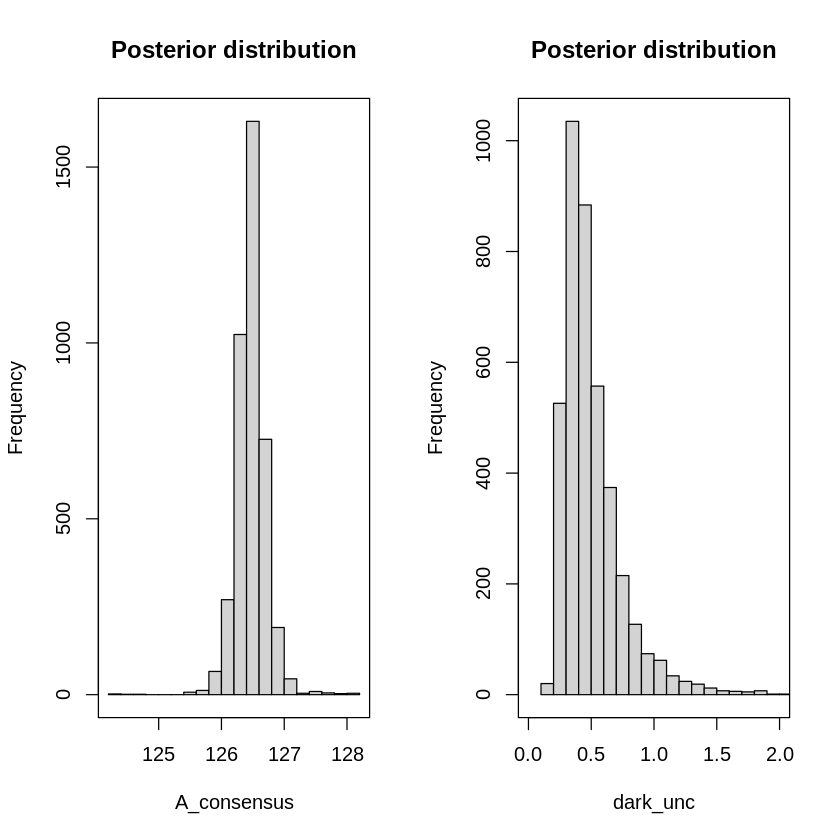

In [31]:
# Draw posterior probability densities for model parameters A_consensus and dark_unc
par(mfrow=c(1,2))
hist(fit$draws()[,,"A_consensus"], main='Posterior distribution', breaks=20, xlab='A_consensus');box()
hist(fit$draws()[,,"dark_unc"], main='Posterior distribution', breaks=40, xlab='dark_unc', xlim=c(0,2));box()